In [24]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from DBpass import password

In [2]:
# Define the connect string
user='postgres'
host='localhost'
port='5432'
database='EmployeeDB'
connect_string=f'postgresql://{user}:{password}@{host}:{port}/{database}'

In [3]:
# Connect to postgres database
engine = create_engine(connect_string)
connection = engine.connect()

In [30]:
# Pull 'EmployeeDB'
employees_df=pd.read_sql_table('employees', con=engine)
salaries_df=pd.read_sql_table('salaries', con=engine)
titles_df=pd.read_sql_table('titles', con=engine)

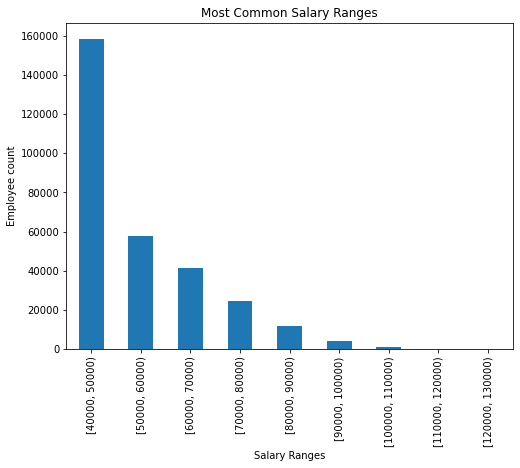

In [28]:
# Create a histogram to visualise the most common salary ranges for employees.

bins=[40000,50000,60000,70000,80000,90000,100000,110000,120000,130000]
segments=pd.cut(salaries_df['salary'],bins,right=False)

counts=pd.value_counts(segments,sort=False)
plt.figure(figsize=(8,6))
b=counts.plot.bar(counts.index.astype(str),counts,title='Most Common Salary Ranges',xlabel='Salary Ranges',ylabel='Employee count')
plt.show()

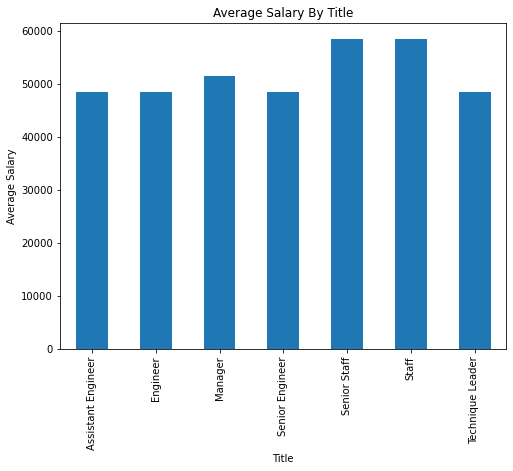

In [42]:
# Create a bar chart of average salary by title.

titles_df.rename(columns={'title_id':'emp_title_id'},inplace=True)
merge_titles_df=pd.merge(employees_df,titles_df,on=['emp_title_id'],how='left')
merge_salaries_df=pd.merge(merge_titles_df,salaries_df,on=['emp_no'],how='left')
group_titles=merge_salaries_df.groupby('title')
avg_salary=group_titles['salary'].mean()
plt.figure(figsize=(8,6))
avg_salary.plot.bar(title='Average Salary By Title',xlabel='Title',ylabel='Average Salary')
plt.show()